In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('daily-bike-share.csv')
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [5]:
data.shape

(731, 14)

In [6]:
data = data.replace(r'^\s*$', np.nan, regex=True)
del data['dteday']

In [7]:
# checking for percentage of missing values in each column
round(100*(data.isnull().sum()/len(data)), 2).sort_values(ascending=False)

rentals       0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
instant       0.0
dtype: float64

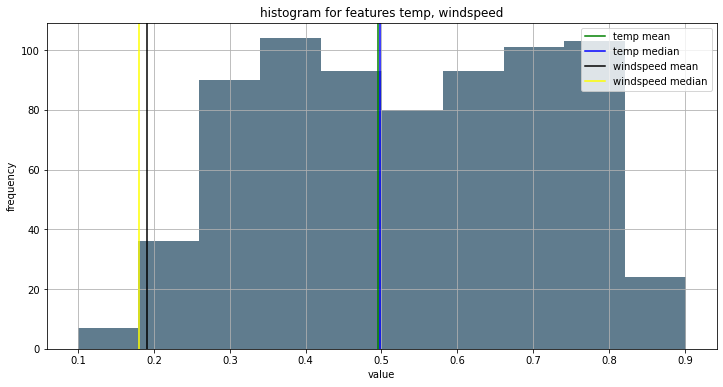

In [28]:
plt.title('histogram for features temp, windspeed')
plt.xlabel('value')
plt.ylabel('frequency')
plt.axvline(x=data.temp.mean(), color = 'green', label = 'temp mean')
plt.axvline(x=data.temp.median(), color = 'blue', label = 'temp median')
plt.axvline(x=data.windspeed.mean(), color = 'black', label = 'windspeed mean')
plt.axvline(x=data.windspeed.median(), color = 'yellow', label = 'windspeed median')
data['temp'].hist(figsize = (12,6),color = '#607c8e', align = 'right')
plt.legend()



In [14]:
X = data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum',
'windspeed']]
y = [data['rentals']]


In [15]:
from sklearn.model_selection import train_test_split


data_train, data_test= train_test_split(data, test_size=0.3, random_state=101)


In [16]:
# RESCALING THE FEATURES
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_train.head()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
53,54,1,0,2,0,3,1,1,0.221739,0.245717,0.423043,0.094113,139
117,118,2,0,4,0,4,1,2,0.617500,0.578929,0.700833,0.320908,569
708,709,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441
60,61,1,0,3,0,3,1,1,0.335000,0.320071,0.449583,0.307833,231
72,73,1,0,3,0,1,1,1,0.325217,0.332000,0.496957,0.136926,359


In [17]:
data_train.columns


Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'rentals'],
      dtype='object')

In [18]:
data_train.head()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
53,54,1,0,2,0,3,1,1,0.221739,0.245717,0.423043,0.094113,139
117,118,2,0,4,0,4,1,2,0.617500,0.578929,0.700833,0.320908,569
708,709,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441
60,61,1,0,3,0,3,1,1,0.335000,0.320071,0.449583,0.307833,231
72,73,1,0,3,0,1,1,1,0.325217,0.332000,0.496957,0.136926,359


In [19]:
y_train = data_train.pop('rentals')
X_train = data_train

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
#calculating r squared error which is score
lm.score(X_train, y_train, sample_weight=None)

0.6881651790614836

In [21]:
lm.coef_


array([-1.16240259e+00,  5.20759547e+01,  7.34318487e+02,  2.52183896e+01,
       -2.98752851e+02,  2.93233873e+01, -8.08867400e+02, -1.44200503e+02,
       -1.07666329e+03,  3.40375927e+03, -3.52687124e+02, -6.02539781e+02])

In [22]:
predictions = lm.predict(X_train)


Text(0, 0.5, 'Predicted Y')

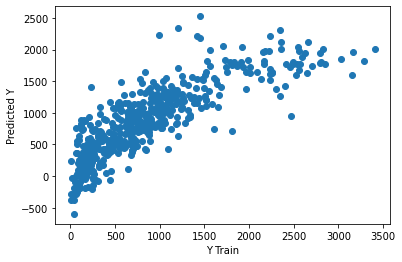

In [23]:
plt.scatter(y_train,predictions)
plt.xlabel('Y Train')
plt.ylabel('Predicted Y')